In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
from DB.db_manager import DBManager

In [3]:
train_imgs, train_labels, test_imgs, test_labels = DBManager.load_data("C:/Users/antho/Documents/GitHub/data/handsigns/")

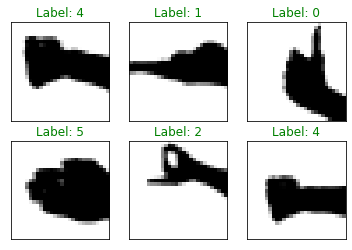

In [4]:
# displaying samples of data
fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(train_imgs[i].reshape([train_imgs.shape[2],
                                      train_imgs.shape[3]]),
               cmap='gray', interpolation='none')
    plt.title("Label: {}".format(train_labels[i]), color='g')  
    plt.xticks([])
    plt.yticks([])

In [5]:
from homemade_framework import framework as NN

In [9]:
# number of epoch
num_epochs = 10
# batch size to compute mini-batch
batch_size = 91
# number of pixels in the image 
input_size = 28*28
# number of possible digit: 0 to 9 
num_class = 7
# small step to find a minima
learning_rate = 0.01
# hidden size
hidden_size = 128
# p dropout
p_dropout = 0
# learning rate decay
LRD = False

## CNN

In [10]:
# Build the model
kernel_size = 3
in_channels = 1
out_channels = 2
data_size = train_imgs.shape[2]
nb_maxpool = 1
out_first_conv = (data_size - kernel_size + 1) // (2*nb_maxpool) - kernel_size + 1

# Build the model
cnn_model = NN.Sequential([NN.Convolution(in_channels=in_channels, out_channels=out_channels, kernel_size=kernel_size),
                           NN.LeakyReLU(), NN.MaxPooling2D(2),
                           NN.Convolution(in_channels=out_channels, out_channels=out_channels, kernel_size=kernel_size),
                           NN.LeakyReLU(), NN.Flatten(), NN.BatchNorm(),
                           NN.Linear((out_first_conv**2)*out_channels, hidden_size), NN.LeakyReLU(), NN.BatchNorm(),
                           NN.Linear(hidden_size, num_class), NN.Softmax()], NN.LossMSE())
# Set the learning rate
cnn_model.set_Lr(learning_rate)
# Print model's parameters
cnn_model.print(print_color=True)

Model description: Linear in green, Activation in blue, Loss in magenta, Softmax in red, Flatten in Gray, Convolution in Cyan, BatchNormalization in Black, MaxPooling2D in Yellow, AveragePooling2D in highlight
	Convolution feature maps: 2, kernel size: (2, 1, 3, 3)
	LeakyReLU activation, a=0.01
	Max Pooling layer, size: 2
	Convolution feature maps: 2, kernel size: (2, 2, 3, 3)
	LeakyReLU activation, a=0.01
	Flatten function
	Batch normalization function: a=1, b=0
	Linear layer shape: [242, 128]
	LeakyReLU activation, a=0.01
	Batch normalization function: a=1, b=0
	Linear layer shape: [128, 7]
	Softmax function
	MSE


In [11]:
NN.train(cnn_model, num_epochs, train_imgs, train_labels, test_imgs, test_labels, batch_size)

Before training: Epoch: 0, Train Error: 85.4945%,        Test Error: 87.4359%, Loss  0.0000
Epoch: 1, Train Error: 45.0549%,        Test Error: 60.0000%, Loss  130.4338
Epoch: 2, Train Error: 24.1758%,        Test Error: 47.1795%, Loss  73.9207
Epoch: 3, Train Error: 13.6264%,        Test Error: 37.1795%, Loss  44.3805
Epoch: 4, Train Error: 7.9121%,        Test Error: 33.8462%, Loss  27.8828
Epoch: 5, Train Error: 5.4945%,        Test Error: 32.0513%, Loss  18.8233
Epoch: 6, Train Error: 3.7363%,        Test Error: 29.2308%, Loss  13.0933
Epoch: 7, Train Error: 2.6374%,        Test Error: 27.9487%, Loss  9.8344
Epoch: 8, Train Error: 1.9780%,        Test Error: 27.4359%, Loss  7.4863
Epoch: 9, Train Error: 1.4286%,        Test Error: 27.6923%, Loss  5.8760
Epoch: 10, Train Error: 1.0989%,        Test Error: 27.9487%, Loss  4.6307

Training time: 0:03:34.964511
After training: Epoch: 9, Train Error: 1.0989%,        Test Error: 27.9487%, Loss  4.6307


In [12]:
cnn_model.getParametersCount()

32069

## FCN

In [13]:
# number of pixels in the image 
input_size = 28*28
# number of hidden neurons
hidden_size = 40

train_imgs_flatten = train_imgs.reshape([train_imgs.shape[0], np.prod(train_imgs.shape[1:])])
test_imgs_flatten = test_imgs.reshape([test_imgs.shape[0], np.prod(test_imgs.shape[1:])])

# Build the model
fcn_model = NN.Sequential([NN.Linear(input_size, hidden_size), NN.LeakyReLU(), NN.BatchNorm(),
                           NN.Linear(hidden_size, hidden_size), NN.LeakyReLU(), NN.BatchNorm(),
                           NN.Linear(hidden_size, num_class), NN.Softmax()], NN.LossMSE())
# Set the learning rate
fcn_model.set_Lr(learning_rate)
# Print model's parameters
fcn_model.print(print_color=True)

Model description: Linear in green, Activation in blue, Loss in magenta, Softmax in red, Flatten in Gray, Convolution in Cyan, BatchNormalization in Black, MaxPooling2D in Yellow, AveragePooling2D in highlight
	Linear layer shape: [784, 40]
	LeakyReLU activation, a=0.01
	Batch normalization function: a=1, b=0
	Linear layer shape: [40, 40]
	LeakyReLU activation, a=0.01
	Batch normalization function: a=1, b=0
	Linear layer shape: [40, 7]
	Softmax function
	MSE


In [14]:
NN.train(fcn_model, num_epochs, train_imgs_flatten, train_labels, test_imgs_flatten, test_labels, batch_size, print_every_n_epochs=5)

Before training: Epoch: 0, Train Error: 88.3516%,        Test Error: 86.9231%, Loss  0.0000
Epoch: 1, Train Error: 56.5934%,        Test Error: 59.2308%, Loss  116.2037
Epoch: 6, Train Error: 20.8791%,        Test Error: 34.1026%, Loss  50.2346

Training time: 0:00:00.141621
After training: Epoch: 9, Train Error: 13.4066%,        Test Error: 27.4359%, Loss  35.0436


In [15]:
fcn_model.getParametersCount()

33331